In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing modules
import pandas as pd
import os

# Read data into papers
papers = pd.read_csv('papers.csv')
# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
2149,2005,On Local Rewards and Scaling Distributed Reinf...,Abstract Missing,On Local Rewards and Scaling Distributed\nRein...
5739,2016,Learning and Forecasting Opinion Dynamics in S...,Social media and social networking sites have ...,Learning and Forecasting Opinion Dynamics in\n...
6171,2016,Neurons Equipped with Intrinsic Plasticity Lea...,Experience constantly shapes neural circuits t...,Neurons Equipped with Intrinsic Plasticity\nLe...
4360,2013,Least Informative Dimensions,We present a novel non-parametric method for f...,Least Informative Dimensions\nFabian H. Sinz\n...
2774,2008,Transfer Learning by Distribution Matching for...,We address the problem of learning classifiers...,Transfer Learning by Distribution Matching\nfo...


# Remove any punctuation, and then lowercase the **text**

In [4]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

2149    on local rewards and scaling distributed\nrein...
5739    learning and forecasting opinion dynamics in\n...
6171    neurons equipped with intrinsic plasticity\nle...
4360    least informative dimensions\nfabian h sinz\nd...
2774    transfer learning by distribution matching\nfo...
Name: paper_text_processed, dtype: object

In [6]:
!pip install wordcloud

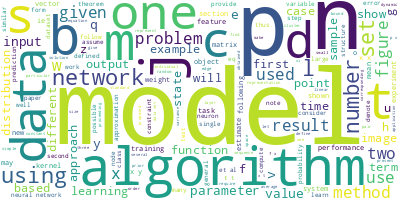

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [11]:
# !pip install gensim nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 kB 45.7 MB/s eta 0:00:00


In [12]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/escurabr/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['local', 'rewards', 'scaling', 'distributed', 'reinforcement', 'learning', 'andrew', 'bagnell', 'robotics', 'institute', 'carnegie', 'mellon', 'university', 'pittsburgh', 'pa', 'andrew', 'ng', 'computer', 'science', 'department', 'stanford', 'university', 'stanford', 'ca', 'dbagnell', 'ricmuedu', 'ang', 'csstanfordedu', 'abstract', 'consider']


In [13]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 3), (4, 1), (5, 4), (6, 20), (7, 10), (8, 1), (9, 3), (10, 1), (11, 1), (12, 33), (13, 1), (14, 34), (15, 1), (16, 3), (17, 22), (18, 13), (19, 1), (20, 1), (21, 7), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1)]


# Building a model with 10 topics

In [14]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"data" + 0.010*"model" + 0.005*"set" + 0.005*"learning" + '
  '0.004*"using" + 0.004*"algorithm" + 0.004*"two" + 0.004*"network" + '
  '0.004*"one" + 0.004*"figure"'),
 (1,
  '0.006*"algorithm" + 0.005*"learning" + 0.005*"set" + 0.005*"two" + '
  '0.004*"data" + 0.004*"time" + 0.004*"given" + 0.004*"model" + '
  '0.003*"networks" + 0.003*"distribution"'),
 (2,
  '0.007*"learning" + 0.006*"data" + 0.006*"model" + 0.005*"algorithm" + '
  '0.004*"problem" + 0.004*"network" + 0.004*"using" + 0.004*"set" + '
  '0.003*"xt" + 0.003*"one"'),
 (3,
  '0.007*"learning" + 0.006*"model" + 0.006*"data" + 0.005*"one" + '
  '0.004*"algorithm" + 0.004*"set" + 0.004*"network" + 0.004*"function" + '
  '0.003*"using" + 0.003*"error"'),
 (4,
  '0.006*"model" + 0.005*"data" + 0.004*"two" + 0.004*"learning" + '
  '0.004*"algorithm" + 0.004*"problem" + 0.004*"network" + 0.004*"set" + '
  '0.004*"time" + 0.003*"one"'),
 (5,
  '0.007*"model" + 0.006*"data" + 0.005*"learning" + 0.004*"set" + '
  '0

https://pyldavis.readthedocs.io/en/latest/

https://speakerdeck.com/bmabey/visualizing-topic-models

In [15]:
!pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached pytest-8.3.3-py3-none-any.whl.metadata (7.5 kB)
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached iniconfig-2.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached pluggy-1.5.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached exceptiongroup-1.2.2-py3-none-any.whl.metadata (6.6 kB)
Using cached future-1.0.0-py3-none-any.whl (491 kB)
Using cached pytest-8.3.3-py3-none-any.whl (342 kB)
Using cached exceptiongroup-1.2.2-py3-none-any.whl (16 kB)
Using cached pluggy-1.5.0-py3-none-any.whl (20 kB)
Using cached iniconfig-2.0.0-py3-none-any.whl (5.9 kB)
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97719 sha256=70a5693610bd5b8b09cd5a171bd48359098b7e46b5ee21a8f7092fdb92e0555d
  Stored in directory: /home/escurabr/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Suc


# Convert the tokenized object into a corpus and dictionary.


In [17]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given